# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [1]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

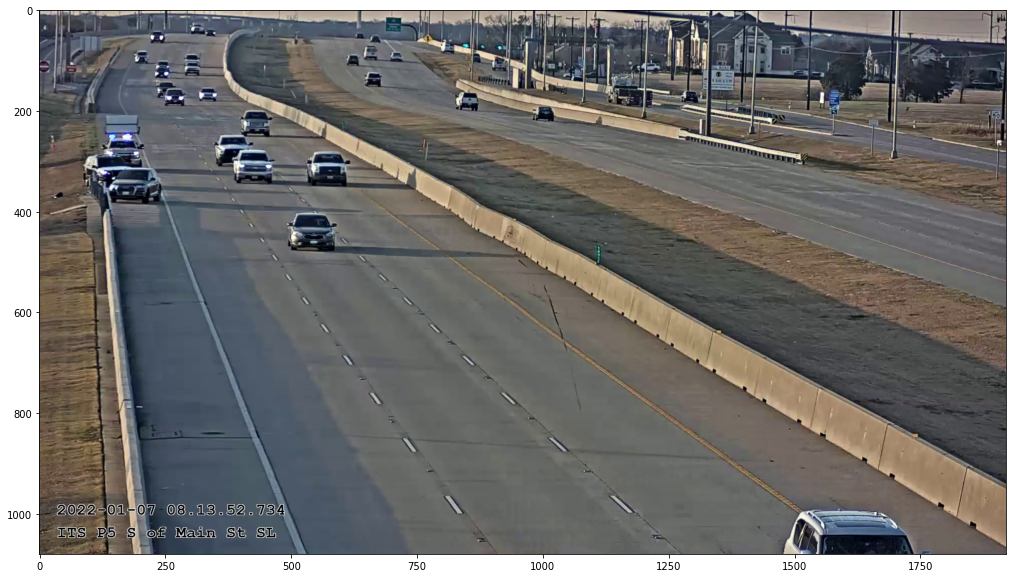

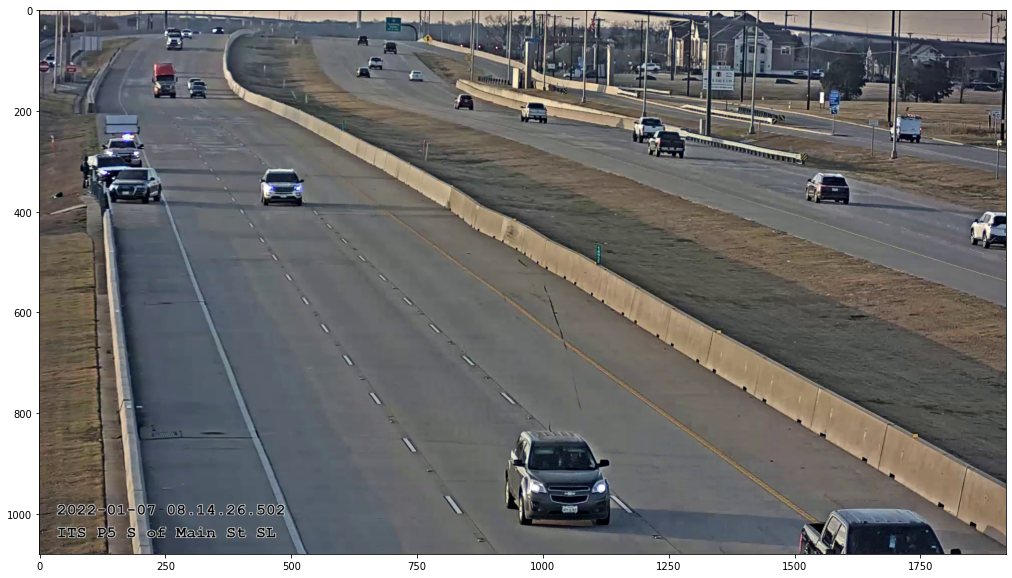

In [2]:
DATA_PATH = '../data/{}'.format(os.getcwd().split('/')[-1])
pathlib.Path(DATA_PATH).mkdir(parents=True, exist_ok=True)

VIDEO_FILE = '/data/MoveOver/Videos/NTTA Jan 2022/PGBT N @ Main St 202201178/its p5 s of main st sl.avi2.avi'

pickle.dump(VIDEO_FILE, open(f'{DATA_PATH}/videopath.p', 'wb'))

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 10, dest_file = './images/frame_view1.jpg');
extractFrame(VIDEO_FILE, frameno = 15*101, dest_file = './images/frame_view2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [3]:

SRC = np.float32([
        [493, 1006], # Bottom left continuous, around the bottom of first dashed line
        [1500, 985], # Bottom right yellow, around the bottom of first dashed line
        [333, 307], # Bottom part of 16th left dashed line 
        [438, 308], # Bottom part of 16th right dashed line 
        [472, 496], # Bottom part of 8th left dashed line 
        [1175, 997], # Bottom first right dashed 
    ])
DST = np.float32([
        [99, 2010], # Bottom left continuous, around the bottom of first dashed line
        [185, 2010], # Bottom right yellow, around the bottom of first dashed line
        [141, 587], # Bottom part of 16th left dashed line 
        [170, 591], # Bottom part of 16th right dashed line 
        [133, 1355], # Bottom part of 8th left dashed line 
        [155, 2008], # Bottom first right dashed 
])


print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[493, 1006], [1500, 985], [333, 307], [438, 308]],
  "birdEyePoints" : [[99, 2010], [185, 2010], [141, 587], [170, 591]],


In [4]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[ 493. 1006.] -> [  99. 2010.]
[1500.  985.] -> [ 185. 2010.]
[333. 307.] -> [141. 587.]
[438. 308.] -> [170. 591.]
[472. 496.] -> [ 133.80202 1379.5095 ]
[1175.  997.] -> [ 156.04976 2013.1859 ]


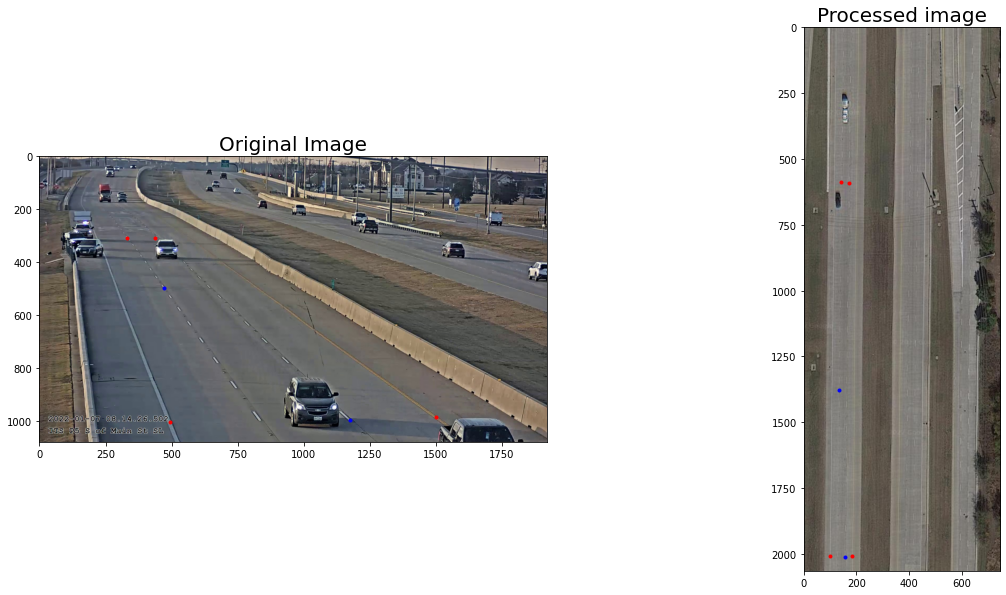

In [5]:
map_file = './images/SkyView.jpg'
ret = displayPoints(SRC, M, './images/frame_view2.jpg', map_file)

In [ ]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_view1.jpg')

# Lane masks

In [ ]:
MASK_PATH = './images/mask.png'

In [ ]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

### Processing mask
Tamper with this code and run it, if something is wrong with the mask

In [ ]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

In [ ]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)